# 2018 - 09 - 20 (jueves)

## Comentarios Tarea 2

## 27 septiembre
    - Propuesta proyecto
## 4 octubre
    - Tarea 3
    - Presentación proyectos

---

## Algunos ejercicios en Pandas

### 1. Cargue Casen 2017 y obtenga estadisticas básicas

Link Casen "small": https://www.dropbox.com/s/jzsx4nccxfkf4nh/Casen%202017small.zip?dl=0

In [2]:
import pandas as pd

df = pd.read_stata(r'C:\Users\carlo\Sync\Clase Data Science\Datos\casen_2017_stata\Casen 2017small.dta')

In [3]:
df.columns

Index(['folio', 'o', 'id_vivienda', 'hogar', 'region', 'provincia', 'comuna',
       'zona', 'expr', 'expc',
       ...
       'hh_d_estado', 'hh_d_servbas', 'hh_d_entorno', 'hh_d_accesi',
       'hh_d_medio', 'hh_d_appart', 'hh_d_tsocial', 'hh_d_seg',
       'pobreza_multi_4d', 'pobreza_multi_5d'],
      dtype='object', length=486)

In [4]:
df.describe

<bound method NDFrame.describe of                folio    o   id_vivienda  hogar                        region  \
0       1.101100e+11  1.0  1.101100e+09    1.0            Región de Tarapacá   
1       1.101100e+11  1.0  1.101100e+09    1.0            Región de Tarapacá   
2       1.101100e+11  1.0  1.101100e+09    1.0            Región de Tarapacá   
3       1.101100e+11  2.0  1.101100e+09    1.0            Región de Tarapacá   
4       1.101100e+11  1.0  1.101100e+09    1.0            Región de Tarapacá   
5       1.101100e+11  2.0  1.101100e+09    1.0            Región de Tarapacá   
6       1.101100e+11  3.0  1.101100e+09    1.0            Región de Tarapacá   
7       1.101100e+11  1.0  1.101100e+09    1.0            Región de Tarapacá   
8       1.101100e+11  2.0  1.101100e+09    1.0            Región de Tarapacá   
9       1.101100e+11  1.0  1.101100e+09    1.0            Región de Tarapacá   
10      1.101100e+11  2.0  1.101100e+09    1.0            Región de Tarapacá   
11    

### 2. Calcule el número de personas por region



In [5]:
df['persona'] = 1
grouped = df.groupby('region')

por_region = grouped[['persona']].sum()

por_region

,persona
region,
Región de Tarapacá,10150
Región de Antofagasta,8510
Región de Atacama,6961
Región de Coquimbo,9952
Región de Valparaíso,19625
Región del Libertador Gral. Bernardo OHiggins,15862
Región del Maule,15208
Región del Biobío,21532
Región de La Araucanía,15481


### 3. Haga un grafico circular con el número de personas por región

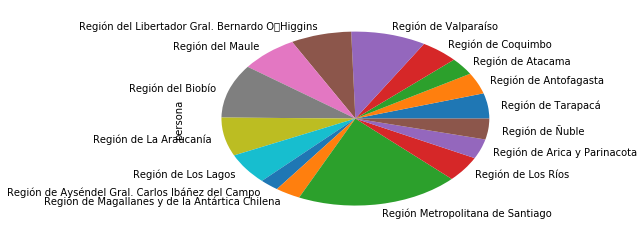

In [6]:
import matplotlib.pyplot as plt

por_region.plot.pie(y='persona', legend=False)

plt.show()

### 4. Repita el gráfico anterior, considerando el factor de expansión regional

In [7]:
df['pers_factor'] = 1 * df['expr']
grouped = df.groupby('region')

por_region_expr = grouped[['pers_factor']].sum()

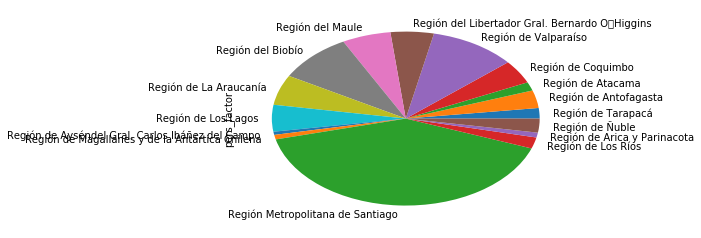

In [8]:
por_region_expr.plot.pie(y='pers_factor', legend=False)
plt.show()

### 5. ¿cuáles regiones están más o menos representadas? (ver ratio entre poblaciones)


In [9]:
# grouped = df.groupby('region')
# por_region_expr = grouped[['persona', 'pers_factor']].sum()

por_region_expr['ratio'] = por_region_expr.pers_factor / por_region.persona

por_region_expr.sort_values(by=['ratio'], ascending=False, inplace=True)

por_region_expr

,pers_factor,ratio
region,,
Región Metropolitana de Santiago,7223236.0,169.555550
Región de Valparaíso,1856498.0,94.598624
Región de Coquimbo,775198.0,77.893690
Región del Biobío,1625099.0,75.473667
Región de Los Lagos,882790.0,70.952419
Región de Antofagasta,586198.0,68.883431
Región del Maule,1047293.0,68.864611
Región de La Araucanía,999730.0,64.577870
Región del Libertador Gral. Bernardo OHiggins,929632.0,58.607490


### 5. Muestre un gráfico de barra, por región, con el porcentaje de mujeres de la región (usar factor exp regional)

Detalle de variables:

http://observatorio.ministeriodesarrollosocial.gob.cl/casen-multidimensional/casen/docs/Libro_de_Codigos_Casen_2017.pdf

In [16]:
df.sexo.describe()

count     216439
unique         2
top        Mujer
freq      113117
Name: sexo, dtype: object

In [17]:
df.sexo.unique()

[Mujer, Hombre]
Categories (2, object): [Hombre < Mujer]

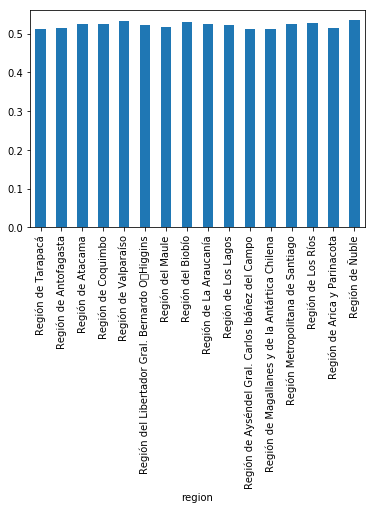

In [14]:
#seleccionamos a las mujeres

df['mujer'] = df['sexo'] == 'Mujer'

#"aumentamos" segun factor de expansion

df['mujer_exp'] = df.mujer * df.expr

#colapsamos por region
group_por_region = df.groupby('region')

por_region_expr = grouped[['mujer_exp', 'pers_factor']].sum()

#calculamos porcentaje
por_region_expr['Porcentaje Mujeres'] = por_region_expr.mujer_exp / por_region_expr.pers_factor

#graficamos

por_region_expr['Porcentaje Mujeres'].plot.bar(y='pers_factor')
plt.show()

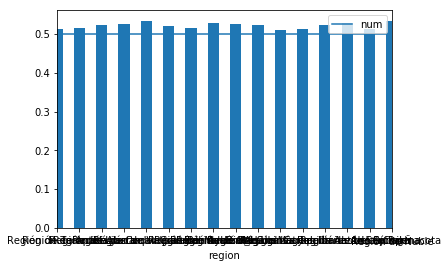

In [18]:

ax = por_region_expr['Porcentaje Mujeres'].plot.bar(y='pers_factor')

por_region_expr['num'] = 0.5

por_region_expr.plot(y='num', ax=ax)
plt.show()

In [19]:
por_region_expr

,mujer_exp,pers_factor,Porcentaje Mujeres,num
region,,,,
Región de Tarapacá,177810.0,346917.0,0.512543,0.5
Región de Antofagasta,302290.0,586198.0,0.515679,0.5
Región de Atacama,149403.0,284814.0,0.524563,0.5
Región de Coquimbo,406945.0,775198.0,0.524956,0.5
Región de Valparaíso,990040.0,1856498.0,0.533284,0.5
Región del Libertador Gral. Bernardo OHiggins,484942.0,929632.0,0.521649,0.5
Región del Maule,540698.0,1047293.0,0.516281,0.5
Región del Biobío,859657.0,1625099.0,0.528987,0.5
Región de La Araucanía,525050.0,999730.0,0.525192,0.5


### 5. Propuesto: Qué regiones están sobre o sub representadas, respecto de los totales de población del Censo 2017?

In [ ]:
# calculamos porcentajes de población por region

# por_region_expr['total_pob'] = sum(por_region_expr.pers_factor)

# unimos con datos del Censo
